In [78]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import hashlib


In [79]:

# def Bloom_Filter(inp_filename, op_filename,n,prob_false_pos):
#     lookup_count = 0  # will store the count of the number of lookups
#     FP_count = 0  # will store the count of the number of False Positives

#     # Create the bit array with the required size and fill them initially with 0.
#     bit_arr_size = round(-(n * np.log(prob_false_pos)) / (np.square(np.log(2))))
#     bloom_fltr = [0] * bit_arr_size

#     hash_func_num= round((bit_arr_size/n)*np.log(2))
    
#     if(hash_func_num==0 or bit_arr_size==0):
#         return [bit_arr_size,hash_func_num]
#     # Function to generate hash functions
#     def filters_to_have():
#         lst_fltr = []
#         for i in range(hash_func_num):
#             lst_fltr.append(char_val_sum % (bit_arr_size + i))
#         return lst_fltr

#     with open(inp_filename, 'r') as file:
#         my_reader = csv.reader(file, delimiter=',')
#         next(file)
#         for row in my_reader:
#             word = row[0]
#             char_val_sum = sum([ord(z) for z in list(word)])
#             lst_fltr = filters_to_have()
#             lst_fltr = [len(bloom_fltr) - 1 if i > len(bloom_fltr) - 1 else i for i in lst_fltr]

#             sum_all = sum([bloom_fltr[i] == 0 for i in lst_fltr])
#             if sum_all > 0:
#                 with open(op_filename, 'a', newline='') as csvfile:
#                     spamwriter1 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#                     spamwriter1.writerow([word])
#                 for ij in lst_fltr:
#                     bloom_fltr[ij] = 1
#             else:
#                 lookup_count += 1
#                 cc = 0
#                 with open(op_filename, 'r') as file:
#                     my_reader = csv.reader(file, delimiter=',')
#                     next(file)
#                     for row1 in my_reader:
#                         word1 = row1[0]
#                         if word == word1:
#                             cc += 1
#                 if cc > 0:
#                     pass
#                 else:
#                     FP_count += 1
#                     with open(op_filename, 'a', newline='') as csvfile:
#                         spamwriter3 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#                         spamwriter3.writerow([word])
#     # print('Number of False Positives: ', FP_count)
#     # print('Number of Lookup Count: ', lookup_count)
#     print("For FPR = ",prob_false_pos," m = ",bit_arr_size," and k = ",hash_func_num)
#     return [bit_arr_size,hash_func_num]

In [80]:

def Bloom_Filter(inp_filename, op_filename, n, prob_false_pos):
    lookup_count = 0  # will store the count of the number of lookups
    FP_count = 0  # will store the count of the number of False Positives

    # Create the bit array with the required size and fill them initially with 0.
    bit_arr_size = round(-(n * np.log(prob_false_pos)) / (np.square(np.log(2))))
    bloom_fltr = [0] * bit_arr_size

    hash_func_num = round((bit_arr_size / n) * np.log(2))

    if hash_func_num == 0 or bit_arr_size == 0:
        return [bit_arr_size, hash_func_num]

    def complex_hash_function(data):
        hasher = hashlib.sha256()
        hasher.update(data.encode())
        hash_value = hasher.hexdigest()
        reversed_hash = hash_value[::-1]
        return int(reversed_hash, 16)  # Convert the reversed hash to an integer

    def filters_to_have(word, i):
        return complex_hash_function(word) % bit_arr_size

    with open(inp_filename, 'r') as file:
        my_reader = csv.reader(file, delimiter=',')
        next(file)
        for row in my_reader:
            word = row[0]
            lst_fltr = [filters_to_have(word, i) for i in range(hash_func_num)]
            
            sum_all = sum([bloom_fltr[i] == 0 for i in lst_fltr])
            if sum_all > 0:
                with open(op_filename, 'a', newline='') as csvfile:
                    spamwriter1 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                    spamwriter1.writerow([word])
                for ij in lst_fltr:
                    bloom_fltr[ij] = 1
            else:
                lookup_count += 1
                cc = 0
                with open(op_filename, 'r') as file:
                    my_reader = csv.reader(file, delimiter=',')
                    next(file)
                    for row1 in my_reader:
                        word1 = row1[0]
                        if word == word1:
                            cc += 1
                if cc > 0:
                    pass
                else:
                    FP_count += 1
                    with open(op_filename, 'a', newline='') as csvfile:
                        spamwriter3 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                        spamwriter3.writerow([word])

    print("For FPR =", prob_false_pos, "m =", bit_arr_size, "and k =", hash_func_num)
    return [bit_arr_size, hash_func_num]

In [81]:
def clear_file(file_path):
    with open(file_path, 'w', newline=''):
        pass  # This creates an empty file

In [82]:
# Experiment with different values of k and n
def experiment_k_n(n,output_file,input_file):
    k_values = []
    fpr_values = []
    m_values = []
    best_k=1
    best_n=1
    ans = 1
    for fpr in range(1, 11):
        target_false_positive_rate=fpr*0.1   
        clear_file(output_file)
        m,k = Bloom_Filter(input_file, output_file, n,target_false_positive_rate)
        print(m,k)
        k_values.append(k)
        m_values.append(m)
        fpr_values.append(target_false_positive_rate)
    return k_values,fpr_values,m_values

In [83]:
def generate_plots(k_values, m_values, false_positive_rates):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(false_positive_rates,k_values, marker='o')
    plt.title('k vs False Positive Rate ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('k (Number of Hash Functions)')

    plt.subplot(1, 2, 2)
    plt.plot(false_positive_rates,m_values, marker='o')
    plt.title('m vs False Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.ylabel('m (Size of the bit array)')

    plt.tight_layout()
    plt.show()

In [84]:
# Call the experiment function
output_file = 'word_drop.csv'
input_file='stream.csv'
n=10000
k_values, false_positive_rates,m_values = experiment_k_n(n,output_file,input_file)


For FPR = 0.1 m = 47925 and k = 3
47925 3
For FPR = 0.2 m = 33498 and k = 2
33498 2
For FPR = 0.30000000000000004 m = 25059 and k = 2
25059 2
For FPR = 0.4 m = 19071 and k = 1
19071 1
For FPR = 0.5 m = 14427 and k = 1
14427 1
For FPR = 0.6000000000000001 m = 10632 and k = 1
10632 1
For FPR = 0.7000000000000001 m = 7424 and k = 1
7424 1
4644 0
2193 0
0 0


In [85]:
k_values, m_values, false_positive_rates

([3, 2, 2, 1, 1, 1, 1, 0, 0, 0],
 [47925, 33498, 25059, 19071, 14427, 10632, 7424, 4644, 2193, 0],
 [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0])

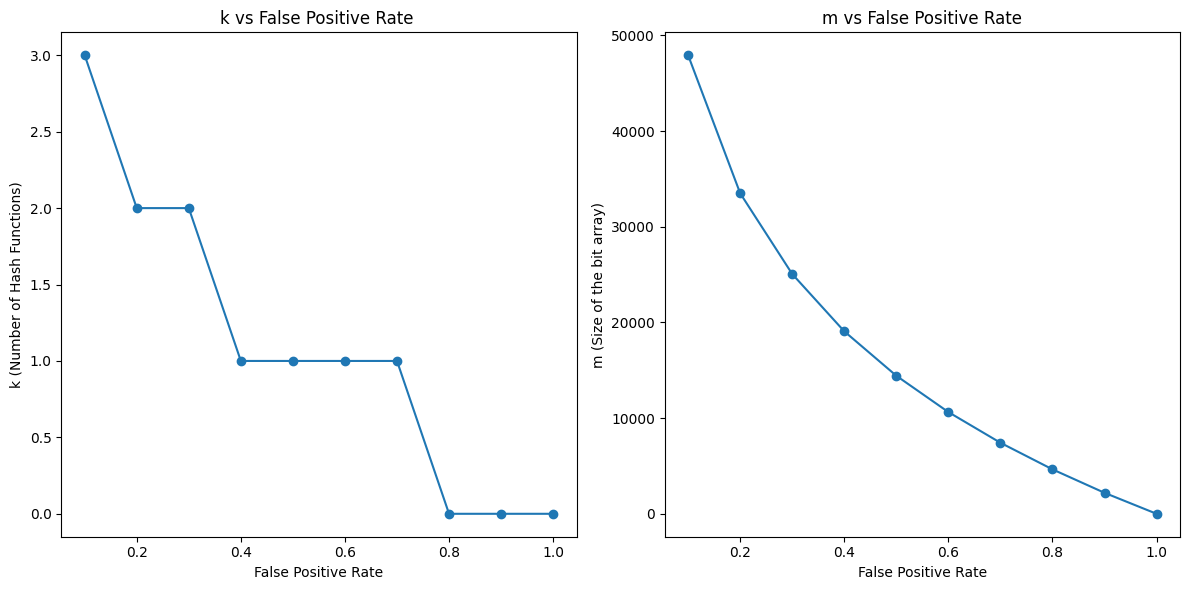

In [86]:
generate_plots(k_values, m_values, false_positive_rates)